In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import joblib

In [10]:
# Load the dataset 

data = pd.read_csv(r"C:\Users\wwwna\OneDrive\Desktop\Caps_Project\digital_marketing_campaign_dataset.csv")
print(data.head())

print(f"Shape of the dataset:{data.shape}")


   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  Ema

In [11]:
# Dataset Exploration

data.info()
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [12]:
# Explore Categorical Features

categorical_columns = ['Gender','CampaignChannel','CampaignType']

for column in categorical_columns:
    print(f"Unique values in '{column}': {data[column].unique()}")

Unique values in 'Gender': ['Female' 'Male']
Unique values in 'CampaignChannel': ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
Unique values in 'CampaignType': ['Awareness' 'Retention' 'Conversion' 'Consideration']


Conversion
1    7012
0     988
Name: count, dtype: int64


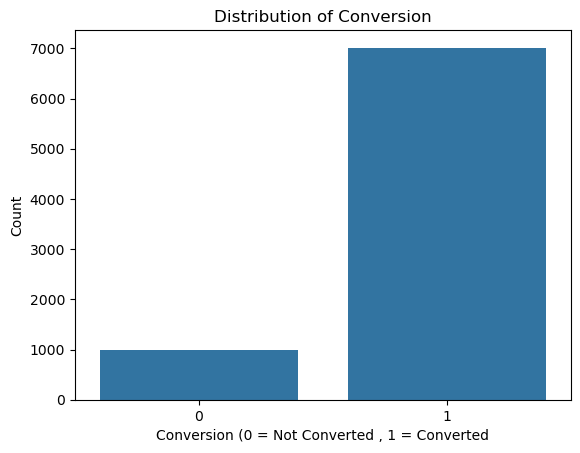

In [13]:
# Target variable distribution

print(data["Conversion"].value_counts())
sns.countplot(x='Conversion',data=data)
plt.title('Distribution of Conversion')
plt.xlabel('Conversion (0 = Not Converted , 1 = Converted')
plt.ylabel('Count')
plt.show()

In [14]:
# We have to exclude the str data type so we can do correlation of the columns 

numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix['Conversion'].sort_values(ascending=False))

Conversion           1.000000
TimeOnSite           0.129609
EmailClicks          0.129521
EmailOpens           0.124884
AdSpend              0.124672
ClickThroughRate     0.120012
PreviousPurchases    0.111781
PagesPerVisit        0.102840
LoyaltyPoints        0.095004
ConversionRate       0.093185
WebsiteVisits        0.079339
Income               0.013974
Age                  0.001606
SocialShares        -0.011449
CustomerID          -0.180742
Name: Conversion, dtype: float64


CampaignChannel
Referral        0.883072
PPC             0.882779
SEO             0.876774
Email           0.870263
Social Media    0.868334
Name: Conversion, dtype: float64


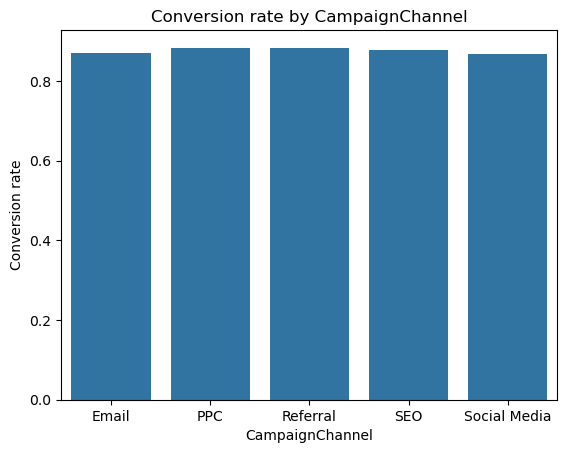

In [15]:
# Conversion rate by CampaignChannel

channel_conversion = data.groupby('CampaignChannel')['Conversion'].mean()
print(channel_conversion.sort_values(ascending=False))
sns.barplot(x=channel_conversion.index,y=channel_conversion.values)
plt.title('Conversion rate by CampaignChannel')
plt.xlabel('CampaignChannel')
plt.ylabel('Conversion rate')
plt.show()

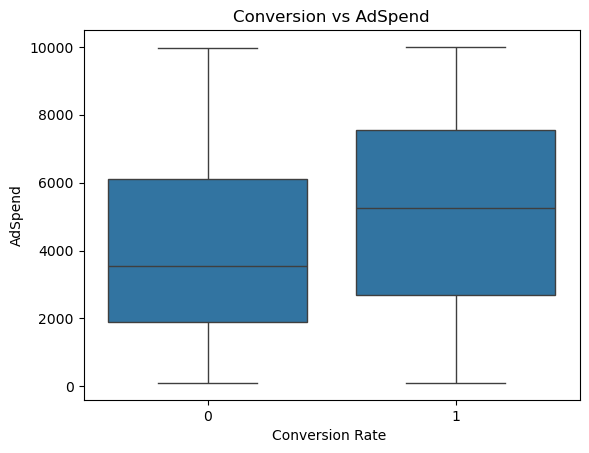

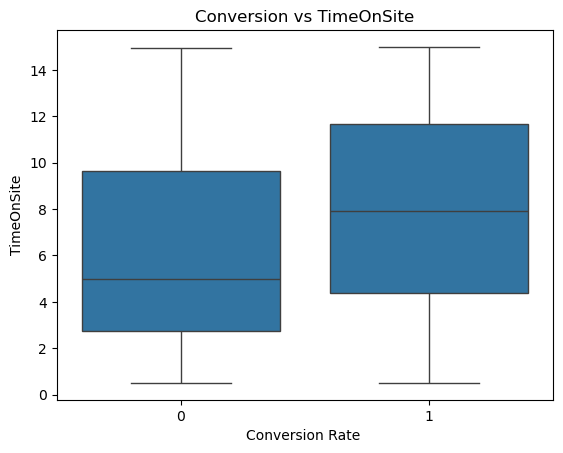

In [16]:
# Analyze Numerical Features 

# Conversion vs AdSpend
sns.boxplot(x='Conversion',y='AdSpend',data=data)
plt.title('Conversion vs AdSpend')
plt.xlabel('Conversion Rate ')
plt.ylabel('AdSpend')
plt.show()


# Conversion vs TimeOnSite
sns.boxplot(x='Conversion',y='TimeOnSite',data=data)
plt.title('Conversion vs TimeOnSite')
plt.xlabel('Conversion Rate ')
plt.ylabel('TimeOnSite')
plt.show()


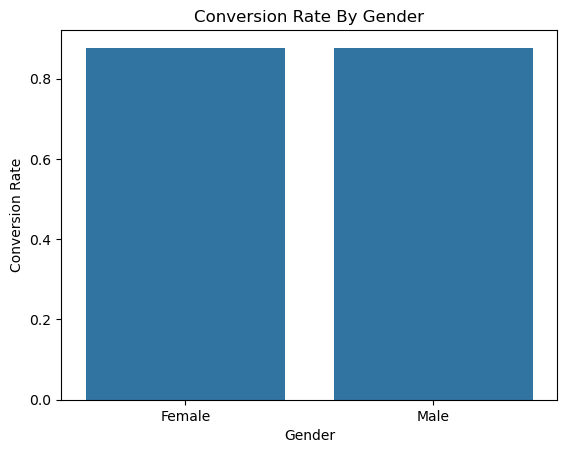

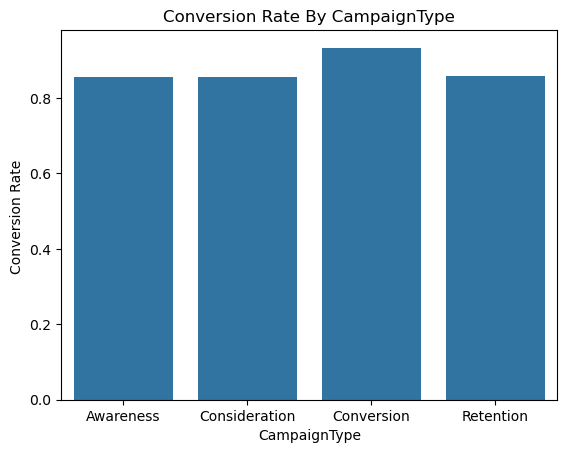

In [17]:
# Analyze Categorical Features 

# Gender Effect on Conversion
gender_conversion = data.groupby('Gender')['Conversion'].mean()
sns.barplot(x=gender_conversion.index,y=gender_conversion.values)
plt.title('Conversion Rate By Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.show()


# CampaignType Effect on Conversion
campaign_conversion = data.groupby('CampaignType')['Conversion'].mean()
sns.barplot(x= campaign_conversion.index,y=campaign_conversion.values)
plt.title('Conversion Rate By CampaignType')
plt.xlabel('CampaignType')
plt.ylabel('Conversion Rate ')
plt.show()


In [18]:
# One-Hot Encoding to convert categorical column to numerical column 

encoded_data = pd.get_dummies(data, columns = ['Gender','CampaignChannel','CampaignType'],drop_first=True)
encoded_data.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,AdvertisingTool,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,ToolConfid,1,False,False,False,False,True,False,False,False
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,ToolConfid,1,True,False,False,False,False,False,False,True
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,ToolConfid,1,False,True,False,False,False,False,False,False
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,ToolConfid,1,False,True,False,False,False,False,True,False
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,ToolConfid,1,False,True,False,False,False,False,True,False


In [19]:
# Define Features and Target

X = encoded_data.drop(['Conversion','AdvertisingTool','AdvertisingPlatform','CustomerID'],axis = 1)
y = encoded_data['Conversion']

In [20]:
# Split Data into ttraining and testing 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Training Features shape: {X_train.shape}")
print(f"Testing Features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training Features shape: (6400, 21)
Testing Features shape: (1600, 21)
Training target shape: (6400,)
Testing target shape: (1600,)


In [21]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic-Regression Model 

In [23]:
# Initialize the model with increased max_iter
log_model = LogisticRegression( max_iter=1000, random_state=42)
log_model.fit(X_train,y_train)

y_pred_log = log_model.predict(X_test)

print("\nClassification Report:\n",classification_report(y_test,y_pred_log))



Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.18      0.28       194
           1       0.90      0.99      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.76      0.58      0.61      1600
weighted avg       0.86      0.89      0.86      1600



In [24]:
# Handle class imbalance with SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Random-Forest Model & Handel class Imbalance

In [26]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42, class_weight= 'balanced')
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,y_pred_rf))
print("\nRandom Forest Performance :\n",classification_report(y_test,y_pred_rf))

Accuracy Score:  0.9162210338680927

Random Forest Performance :
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      1377
           1       0.93      0.91      0.92      1428

    accuracy                           0.92      2805
   macro avg       0.92      0.92      0.92      2805
weighted avg       0.92      0.92      0.92      2805



Decision Tree Model 

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,y_pred_dt))
print("Decision Tree Performance :\n", classification_report(y_test,y_pred_dt))

Accuracy Score:  0.8
Decision Tree Performance :
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1377
           1       0.82      0.77      0.80      1428

    accuracy                           0.80      2805
   macro avg       0.80      0.80      0.80      2805
weighted avg       0.80      0.80      0.80      2805



Gradient Boosting Model 

In [30]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train,y_train)
y_pred_gb = gb_model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,y_pred_gb))
print("Gradient Boosting Performance :\n",classification_report(y_test,y_pred_gb))

Accuracy Score:  0.8745098039215686
Gradient Boosting Performance :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1377
           1       0.87      0.89      0.88      1428

    accuracy                           0.87      2805
   macro avg       0.87      0.87      0.87      2805
weighted avg       0.87      0.87      0.87      2805



<Figure size 600x400 with 0 Axes>

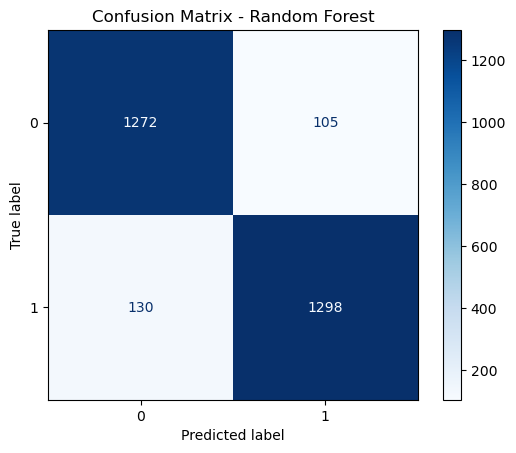

<Figure size 600x400 with 0 Axes>

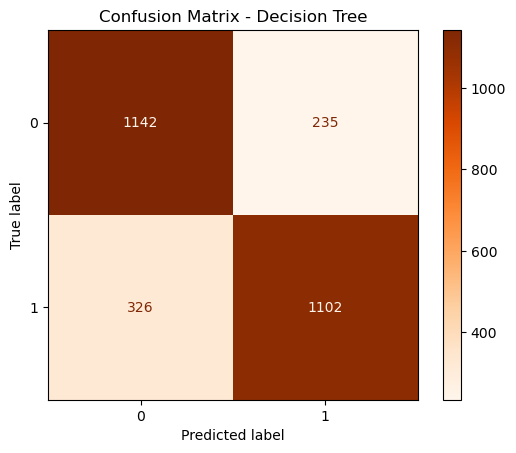

<Figure size 600x400 with 0 Axes>

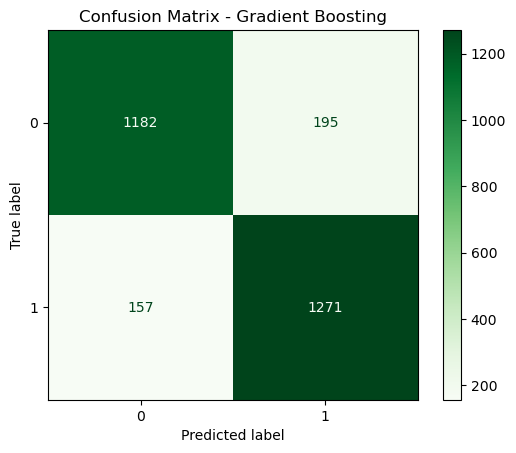

In [31]:
# Plot Confusion Matrix for Random Forest

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Plot Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, cmap="Greens")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


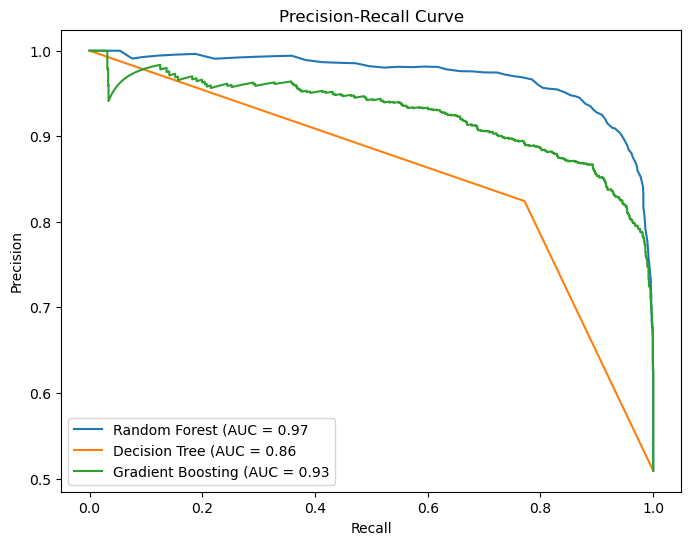

In [32]:
# Predcision-Recall Curve 
plt.figure(figsize=(8,6))
for model, label in zip([rf_model, dt_model, gb_model], ['Random Forest', 'Decision Tree', 'Gradient Boosting']):
    probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, probs)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'{label} (AUC = {auc_score:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Features Importance

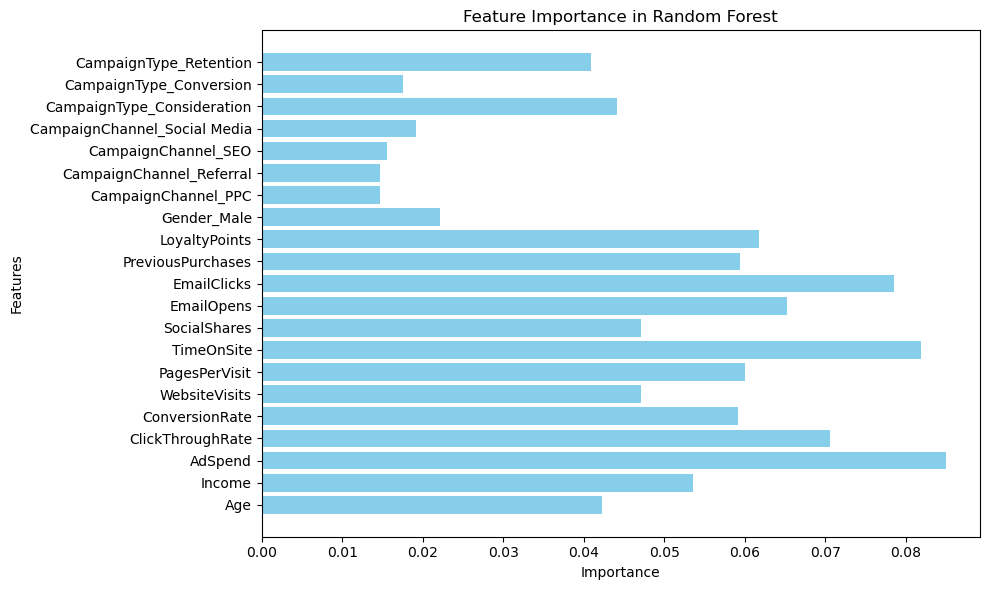

In [34]:
# Feature Importance

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [35]:
# Perform Cross_validation

cv_score = cross_val_score(rf_model,X,y, cv=5, scoring='accuracy')

print('Cross-validation Accuracy score: ',cv_score)
print('Mean Accuracy : ',cv_score.mean())
print('Standard Deviation: ',cv_score.std())

Cross-validation Accuracy score:  [0.886875 0.88625  0.88875  0.883125 0.875625]
Mean Accuracy :  0.884125
Standard Deviation:  0.0046199296531440875


In [36]:
# Save and Load Final Model

joblib.dump(rf_model,'final_random_forest_model.pkl')
rf_model_loaded = joblib.load('final_random_forest_model.pkl')
y_pred_loaded = rf_model_loaded.predict(X_test)
print('Loaded Model Accuracy: ',accuracy_score(y_test, y_pred_loaded))

Loaded Model Accuracy:  0.9162210338680927


In [37]:
# Save the processed dataset for Power BI

data.to_csv('digital_marketing_dashboard_data.csv', index=False)
print('Data exported succesfully for Power BI ')

Data exported succesfully for Power BI 
